<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-results" data-toc-modified-id="Plot-results-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot results</a></span></li></ul></div>

In [26]:
import glob
import numpy as np
import matplotlib.pyplot as plt

## Plot results



In [69]:
filename = '../data/exp_N50_sweep600.npy'

In [70]:
exp = np.load(filename, allow_pickle=True)
exp = exp.item()

In [96]:
def plot_exp(exp):
    # load the vars from exp
    temps, N, therm_sweeps, measure_sweeps =  [exp[x] for x in
        ['temps', 'N', 'therm_sweeps', 'measure_sweeps']
    ]
    energies, heat, magn, susc = [exp[x] for x in
        ['energies', 'heat', 'magn', 'susc']
    ]
    
    fig, axs = plt.subplots(1,2, figsize=(10,4))

    fig.suptitle(
        ('Ising with conv2d.\n'
         f'{N=}, {therm_sweeps=}, {measure_sweeps=}\n '
        )
        #, y=1.00
        , fontsize=13
    )

    plt.sca(axs[0])
    plt.errorbar(temps, energies/N**2
                 , yerr=heat/N**2
                 , capsize=2
                )
    plt.gca().twinx()
    plt.plot(temps, heat/temps, 'red', label='Specific heat')
    plt.legend(loc='upper left')

    plt.sca(axs[1])
    #plt.plot(temps, magnetizations/N**2)
    plt.errorbar(temps, magn/N**2
                 , yerr=susc/N**2
                 , capsize=2
                )
    plt.gca().twinx()
    plt.plot(temps, susc/temps/N**2, 'red', label='M. Susceptibility')

    plt.legend(loc='center left')

    [ax.grid() for ax in axs]
    [ax.set_title(x) for ax,x in zip(axs, ['Energy', 'Magnetization'])]
    [ax.set_xlabel('kT') for ax in axs]
    plt.subplots_adjust(top=0.80)


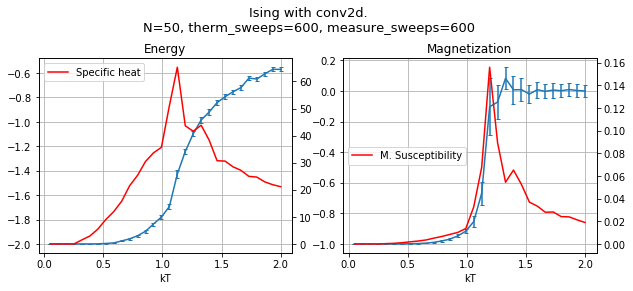

In [110]:
plot_exp(exp)
N = exp['N']
sweeps = exp['therm_sweeps']
#plt.savefig(f'../data/figures/Ising_conv2d_N{N}_{sweeps}sweeps.png')

In [87]:
temps, energies, heat, magn, susc = [exp[x] for x in
    ['temps', 'energies', 'heat', 'magn', 'susc']
]
heat = heat/temps
susc = susc/temps


In [106]:
def to_reduced_temps(temps, x):
    t_c = temps[np.argmax(x)]
    red_temps = (temps - t_c)/t_c
    return red_temps

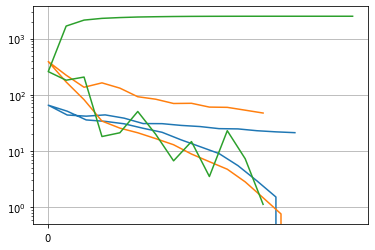

In [109]:
plt.plot(np.abs(to_reduced_temps(temps, heat)), np.abs(heat))
plt.plot(np.abs(to_reduced_temps(temps, susc)), np.abs(susc))
plt.plot(np.abs(to_reduced_temps(temps, susc)), np.abs(magn))
plt.yscale('log')
plt.xscale('symlog')
plt.grid()
